## Problem Statement

### Business Context

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* **case_id:** ID of each visa application
* **continent:** Information of continent the employee
* **education_of_employee:** Information of education of the employee
* **has_job_experience:** Does the employee has any job experience? Y= Yes; N = No
* **requires_job_training:** Does the employee require any job training? Y = Yes; N = No
* **no_of_employees:** Number of employees in the employer's company
* **yr_of_estab:** Year in which the employer's company was established
* **region_of_employment:** Information of foreign worker's intended region of employment in the US.
* **prevailing_wage:**  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* **unit_of_wage:** Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* **full_time_position:** Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* **case_status:**  Flag indicating if the Visa was certified or denied

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks "\_\_\_\_\_" are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every "\_\_\_\_\_" blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations derived from the analysis in the presentation and submit the same.
    * Any mathematical or computational details which are a graded part of the project can be included in the *Appendix* section of the presentation.

## Installing and Importing the necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 58.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Getting requirements to build wheel ... error
error: subprocess-exited-with-error

× Getting requirements to build wheel did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [2]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV

# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Import Dataset

In [110]:
# Uncomment and execute the code snippets below if the data is stored in Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [111]:
visa = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Advance Machine Learning/Week4-Project-EasyVisa/EasyVisa.csv') ## Complete the code to read the data

In [112]:
# Copying data to another variable to avoid making changes to the original data
data = visa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [113]:
data.head() ##  Complete the code to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [114]:
data.tail() ##  Complete the code to view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [115]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

* The dataset has 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [117]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

np.int64(0)

## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

In [118]:
data.describe() ##  Complete the code to print the statistical summary of the data

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


Numerical columns (no_of_employees, yr_of_estab, prevailing_wage) show large variation — data from diverse companies.

No negative or invalid values detected; data quality looks good.

prevailing_wage has wide spread → possible outliers to review later.

#### Fixing the negative values in number of employees columns

In [119]:
data.loc[data['no_of_employees'] < 0].shape  ## Complete the code to check negative values in the employee column

(33, 12)

In [120]:
# taking the absolute values for number of employees
data["no_of_employees"] = abs(data["no_of_employees"])

#### Let's check the count of each unique category in each of the categorical variables

In [121]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

case_id
EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV13       1
EZYV12       1
EZYV11       1
EZYV10       1
EZYV09       1
Name: count, Length: 25480, dtype: int64
--------------------------------------------------
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
--------------------------------------------------
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
--------------------------------------------------
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
--------------------------------------------------
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
--------------------------------------------------
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      

Obsersation:
- Categorical columns are clean and contain valid categories.
- case_status is fairly balanced — good for classification.
- Most applicants are experienced, highly educated, and apply for full-time roles.

In [122]:
# checking the number of unique values
data["case_id"].unique() ## Complete the code to check unique values in the mentioned column

array(['EZYV01', 'EZYV02', 'EZYV03', ..., 'EZYV25478', 'EZYV25479',
       'EZYV25480'], dtype=object)

In [123]:
data.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

### Univariate Analysis

In [124]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [125]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

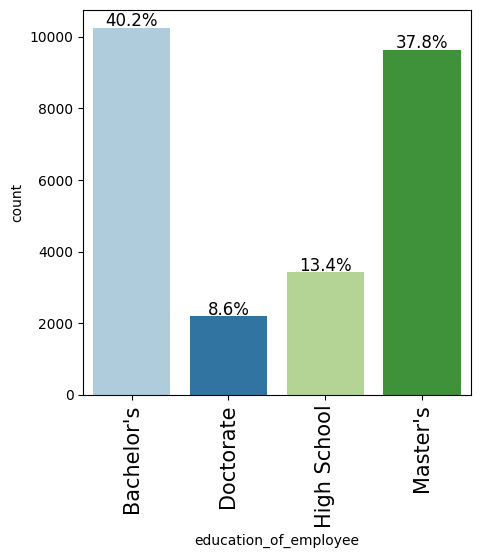

In [126]:
labeled_barplot(data, "education_of_employee", perc=True)

**Saroj's Observation:**
- Majority of applicants hold Bachelor’s or Master’s degrees,

indicating a skilled and qualified workforce for visa applications.

#### Observations on region of employment

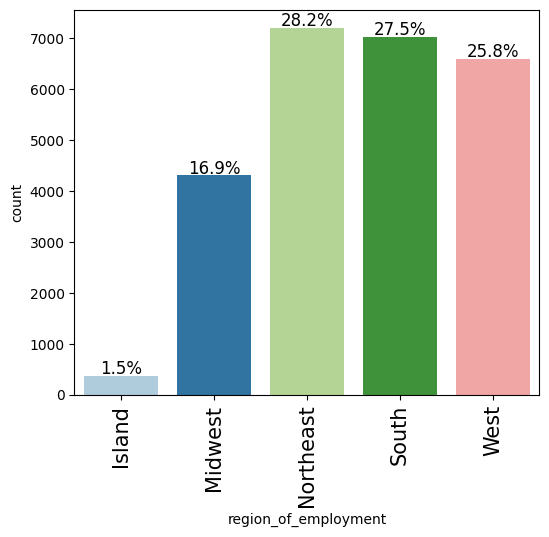

In [127]:
labeled_barplot(data,"region_of_employment",perc=True)  ## Complete the code to create labeled_barplot for region of employment

**Saroj's Observation:**
- Most visa applications are from the Northeast and West regions,

showing strong foreign worker demand in key U.S. business hubs.

#### Observations on job experience

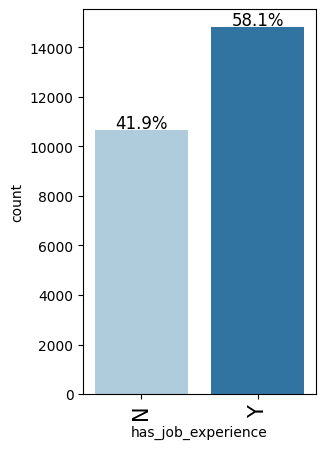

In [128]:
labeled_barplot(data,"has_job_experience",perc=True) ## Complete the code to create labeled_barplot for job experience

**Saroj's Observation:**
- Most applicants have prior job experience,suggesting employers

prefer experienced professionals for visa sponsorship.

#### Observations on case status

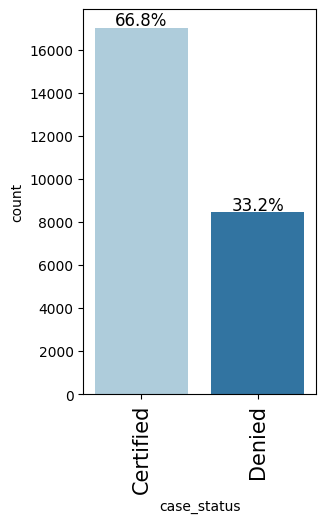

In [129]:
labeled_barplot(data,"case_status",perc=True) ## Complete the code to create labeled_barplot for case status

**Saroj's Observation:**
-Case status is fairly balanced between Certified and Denied,

making the data suitable for building unbiased classification models.


### Bivariate Analysis

#### Correlation Check

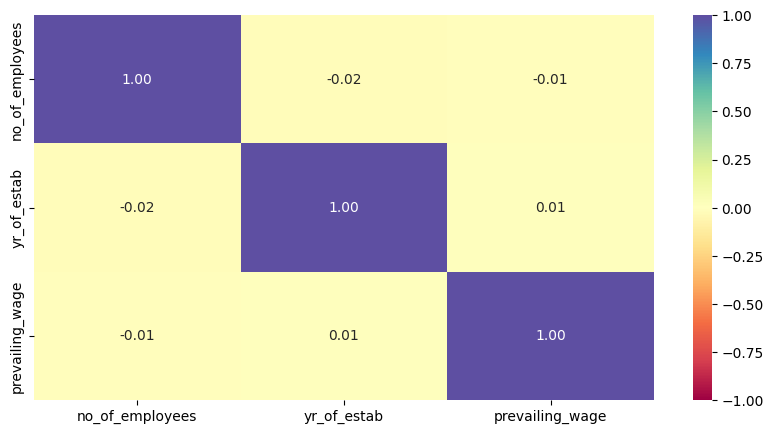

In [130]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Saroj's Observation:**
- No high correlation among numeric features. All variables contribute unique information and can be kept for modeling.

**Creating functions that will help us with further analysis.**

In [131]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [132]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### **Does higher education increase the chances of visa certification for well-paid jobs abroad?**

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


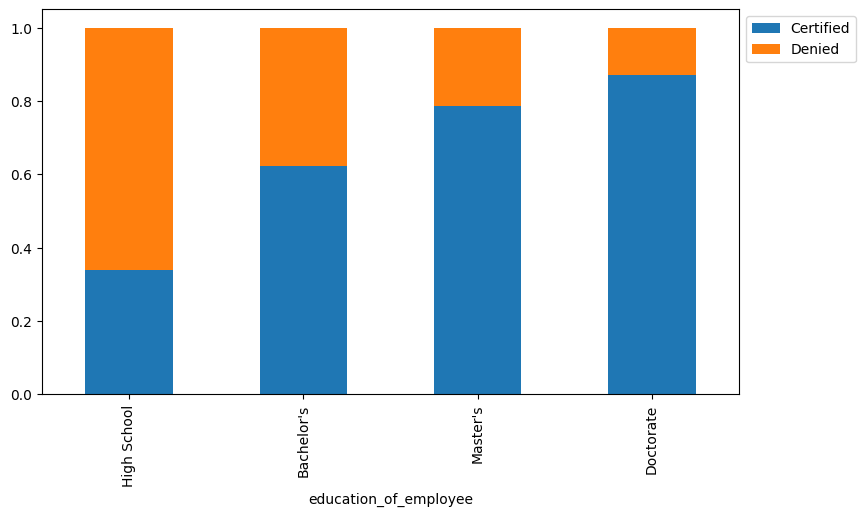

In [133]:
stacked_barplot(data, "education_of_employee", "case_status")

**Saroj's Observation:**
- Higher education levels (Master’s, Doctorate) are linked to higher visa approval rates.
Education is a strong predictor of certification outcomes.


#### **How does visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


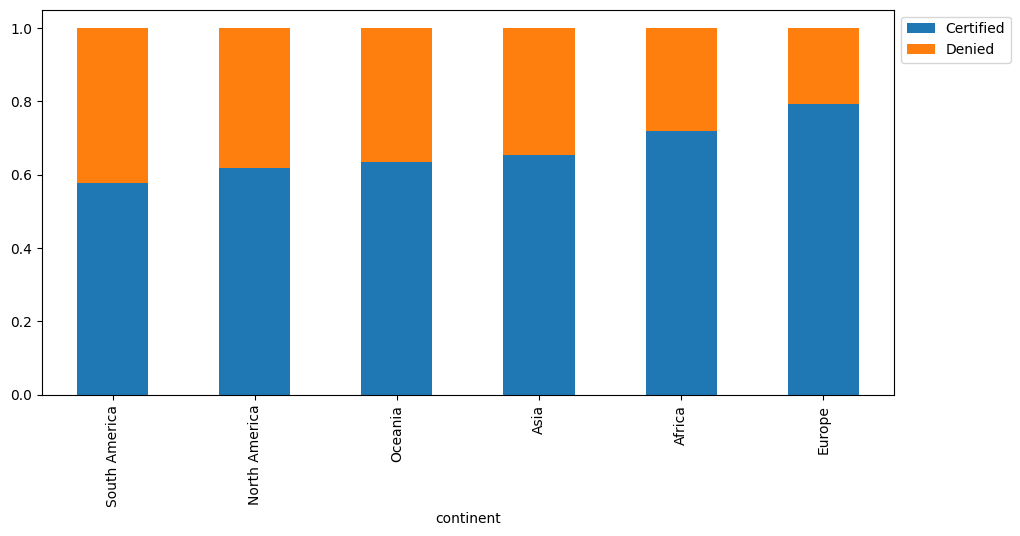

In [134]:
stacked_barplot(data,"continent", "case_status") ## Complete the code to plot stacked barplot for continent and case status

**Saroj's Observation:**
- Majority of applicants are from Asia and Europe. Approval rates are largely similar across continents, showing no major regional bias.


#### **Does having prior work experience influence the chances of visa certification for career opportunities abroad?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


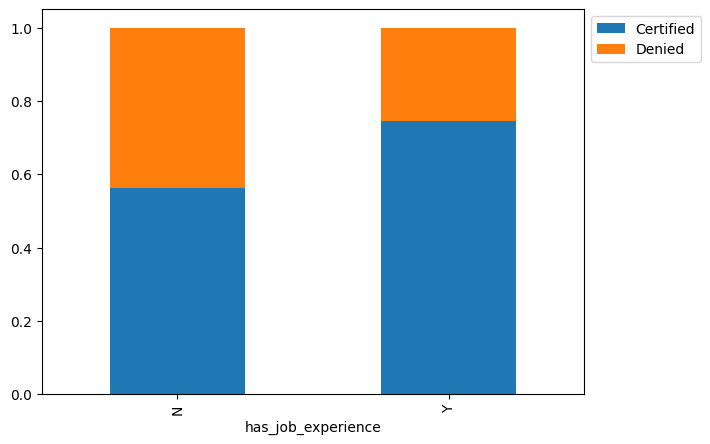

In [135]:
stacked_barplot(data,"has_job_experience","case_status") ## Complete the code to plot stacked barplot for case status and job experience

**Saroj's Observation:**
-  Applicants with job experience have higher visa approval rates. Experience is a key factor influencing certification outcomes.


  #### **Is the prevailing wage consistent across all regions of the US?**

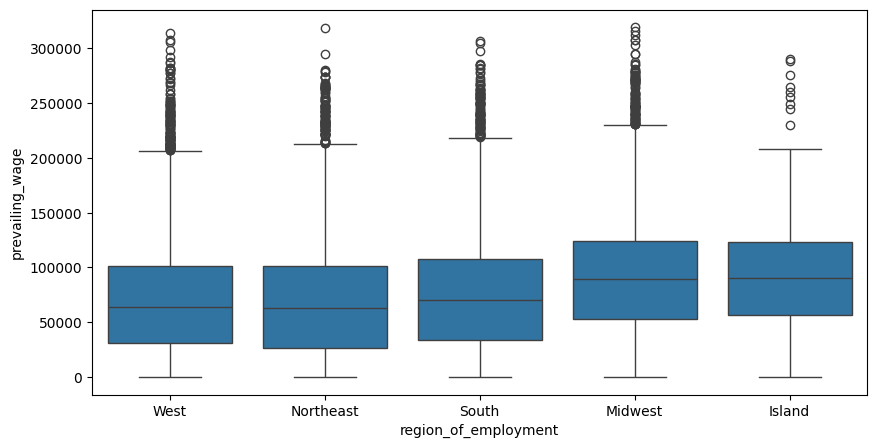

In [136]:
  plt.figure(figsize=(10, 5))
  sns.boxplot(data=data,  x="region_of_employment", y="prevailing_wage") ## Complete the code to create boxplot for region of employment and prevailing wage
  plt.show()

**Saroj's Observation:**
- Prevailing wage varies by region.
- Midwest and Island regions show the highest median wages, indicating stronger demand or premium compensation for skilled roles.



#### **Does visa status vary with changes in the prevailing wage set to protect both local talent and foreign workers?**

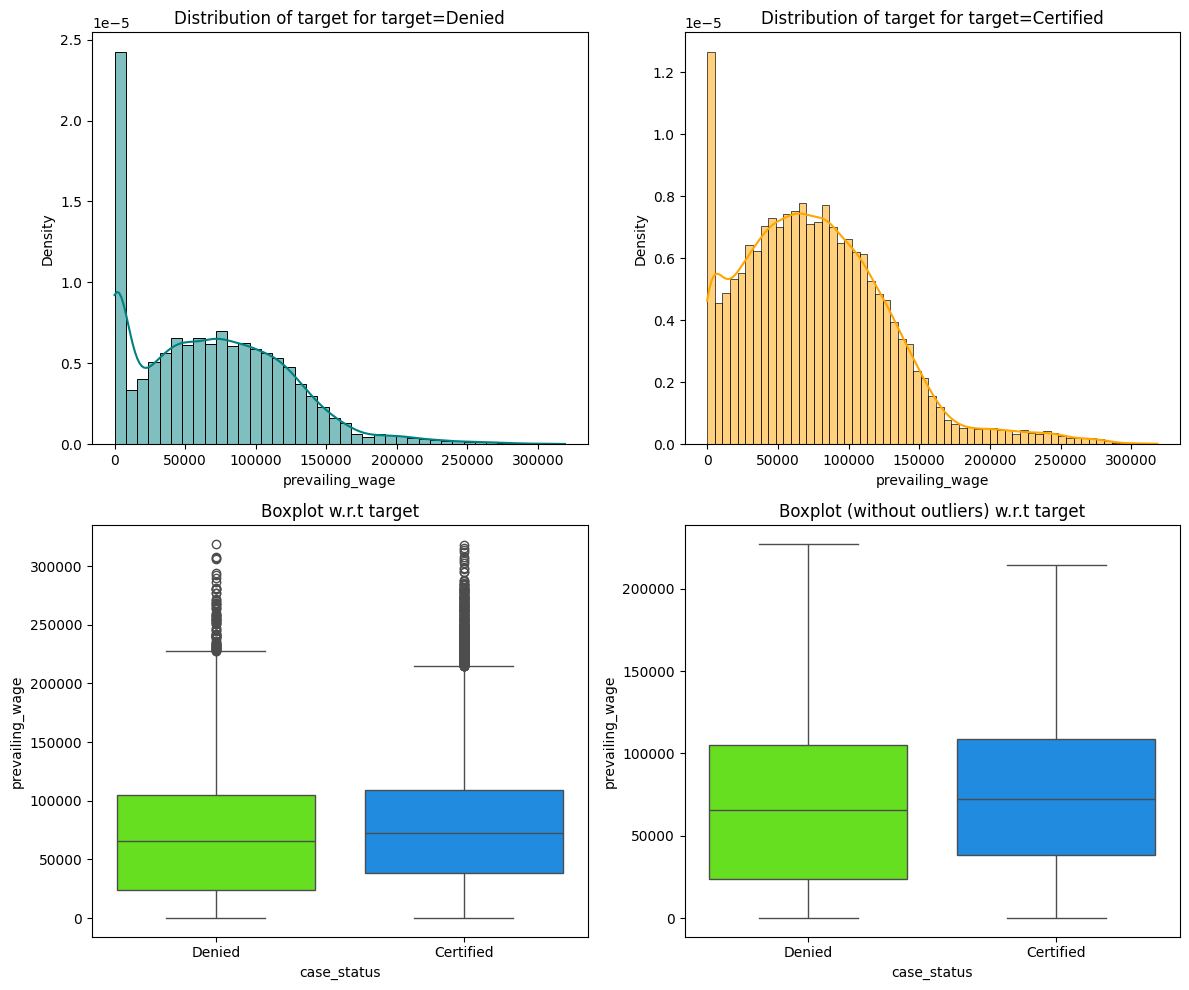

In [137]:
distribution_plot_wrt_target(data,"prevailing_wage", "case_status") ## Complete the code to find distribution of prevailing wage and case status

**Saroj's Observation:**
- Certified cases are concentrated at higher prevailing wages.
- Higher wages correlate with better approval chances, protecting both local and foreign worker interests.


#### **Does the unit of prevailing wage (Hourly, Weekly, etc.) have any impact on the likelihood of visa application certification?**

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


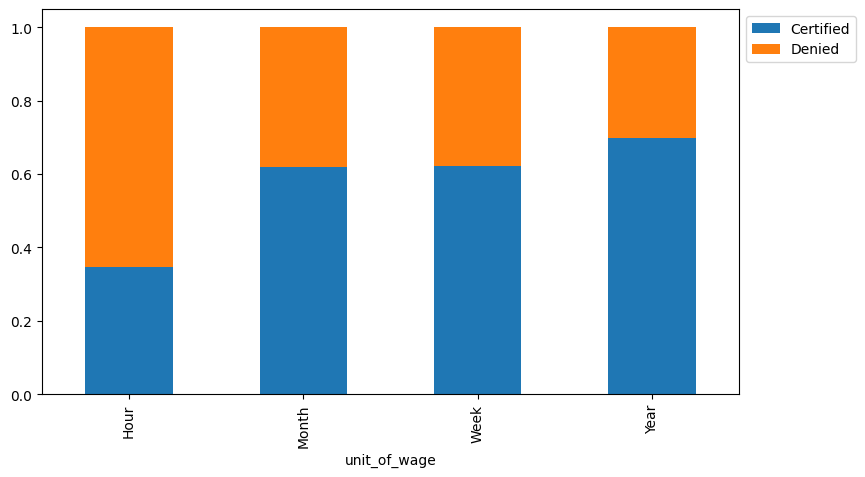

In [138]:
stacked_barplot(data,"unit_of_wage", "case_status") ## Complete the code to plot stacked barplot for unit of wage and case status

**Saroj's Observation:**
- Visa approvals are higher for Yearly and Monthly wage units.
- Hourly positions show more denials, suggesting preference for stable, full-time roles.

## Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

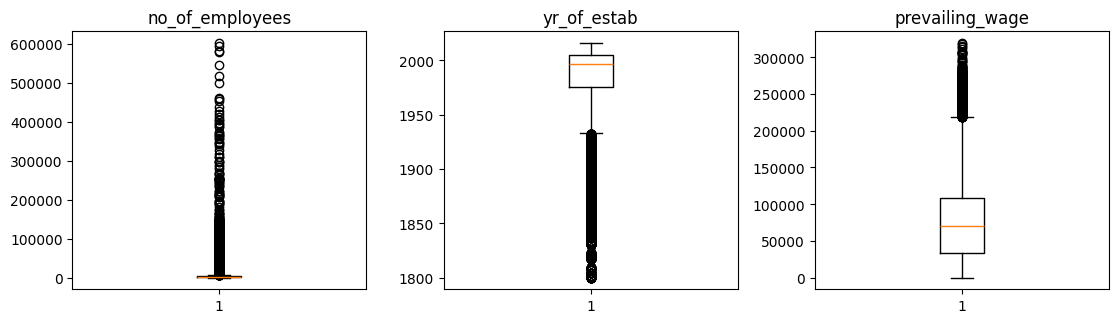

In [139]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Saroj's Observation:**
- Outliers detected in prevailing_wage and no_of_employees.
- They seem genuine, reflecting real business variation, not data errors.

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [140]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(['case_status'],axis=1) ## Complete the code to drop case status from the data
y = data["case_status"]


X = pd.get_dummies(X,drop_first=True)

# Complete the code to split the dataset into train and valid with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# # Complete the code to split the dataset into valid and test with a ratio of 9:1
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.1,random_state=1,stratify=y_val
)


In [141]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of Validation set :  (6879, 21)
Shape of test set :  (765, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in validation set:
case_status
1    0.66783
0    0.33217
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667974
0    0.332026
Name: proportion, dtype: float64


**Saroj's Observation:**


## Model Building

### Model Evaluation Criterion

- Choose the primary metric to evaluate the model on
- Elaborate on the rationale behind choosing the metric

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The `model_performance_classification_sklearn` function will be used to check the model performance of models.
* The `confusion_matrix_sklearn` function will be used to plot the confusion matrix.

In [142]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [143]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [144]:
scorer = metrics.make_scorer(metrics.f1_score) ## Complete the code to define the metric

## Possible metrics are [recall_score,f1_score,accuracy_score,precision_score]
## For example, metrics.precision_score

**Saroj's Observation**
- F1-score gives the best trade-off between identifying correct approvals and avoiding false certifications.
- It’s robust to mild imbalance and aligns with the goal of accuracy + fairness.

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with Original data

In [145]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train,y_train) ## Complete the code to fit the model on original training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7756586246579394
Random forest: 0.8037837241749051
GBM: 0.823039791269532
Adaboost: 0.8203377989495703
Xgboost: 0.8095211182586954
dtree: 0.7410652876513099

Validation Performance:

Bagging: 0.7675817565350541
Random forest: 0.7972364702187794
GBM: 0.8195818459969403
Adaboost: 0.8158053488839735
Xgboost: 0.8083918974782968
dtree: 0.7477497255762898


**Saroj decison:**
- n_splits=5: Common, reliable trade-off between bias/variance and runtime.
- also tried with n_splits=10
- StratifiedKFold: Keeps the Certified/Denied ratio consistent in each fold.
- f1_score: Balances precision (avoid false approvals) and recall (don’t miss qualified applicants) — perfect for early-stage triage.

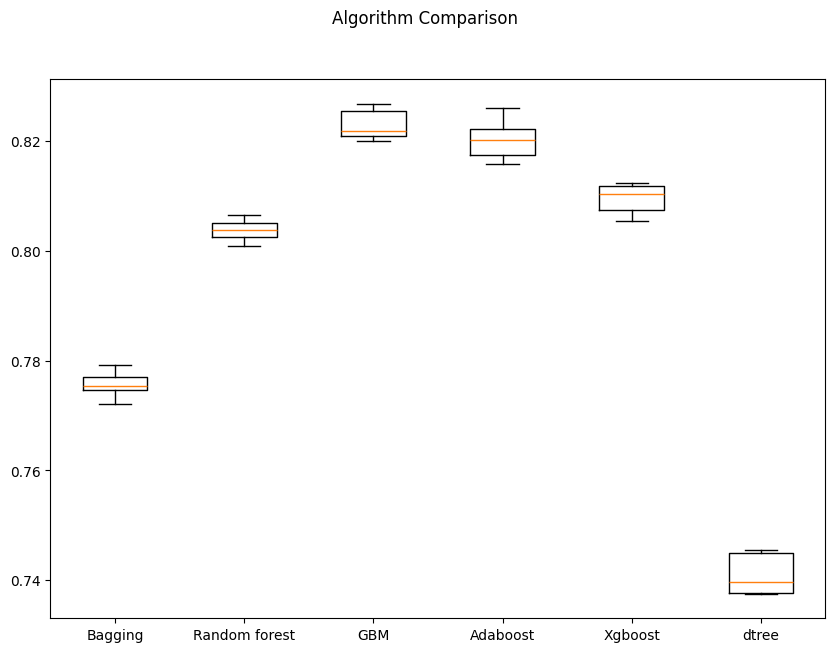

In [146]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Saroj Observation :**
- GBM achieved the best F1 (~0.82) on both CV and validation sets, showing strong generalization.  
- AdaBoost and Random Forest performed closely behind.  
- Decision Tree was weakest, confirming ensemble methods are more effective.
- GBM maintained the highest F1 (~0.82) across both 5 and 10 splits.

### Model Building with Oversampled data

In [147]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1) ## Complete the code to set the k-nearest neighbors
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,) 



**Saroj's Decision:**

Choosing k_neighbors=5 is a common practice when using SMOTE. It means that when generating synthetic samples for the minority class, SMOTE will consider the 5 nearest neighbors of a minority class data point to create a new, synthetic data point that is a combination of the original data point and its neighbors. This helps in creating diverse synthetic samples without being too influenced by outliers or creating samples that are too far from the original minority class distribution. It's a good starting point, and you could experiment with other values if needed.



In [152]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over,y_train_over) ## Complete the code to fit the model on oversampled training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7553714301070087
Random forest: 0.7935193362866556
GBM: 0.8076949280007495
Adaboost: 0.8013161599972107
Xgboost: 0.799430071068073
dtree: 0.7236479557474234

Validation Performance:

Bagging: 0.7606724176067242
Random forest: 0.7953896584540552
GBM: 0.8125259228535877
Adaboost: 0.8120255086547221
Xgboost: 0.8039950062421972
dtree: 0.7387687188019967


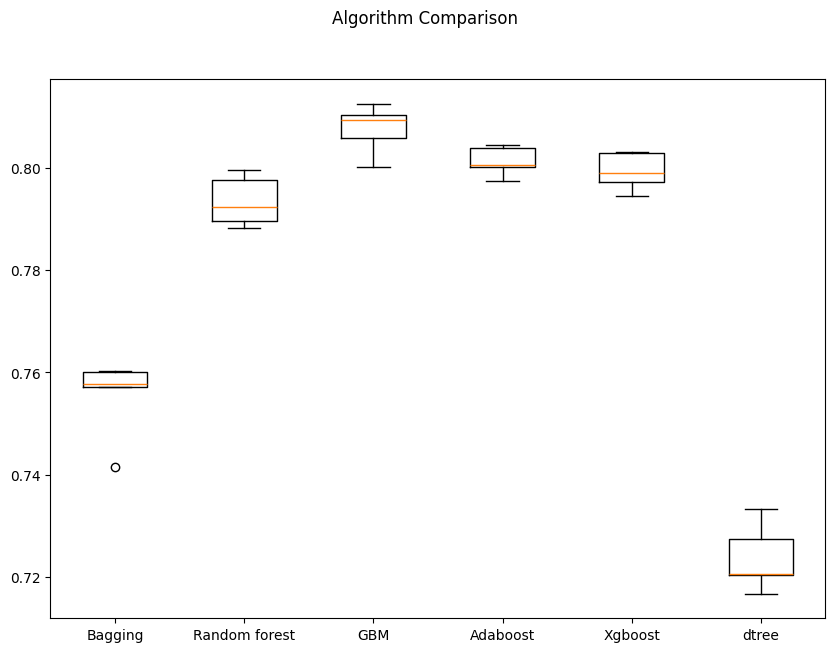

In [153]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with Undersampled data

In [154]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 



In [155]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un,y_train_un) ## Complete the code to fit the model on undersampled training data

    # scores = accuracy_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is accuracy
    # scores = recall_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is recall
    # scores = precision_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is precision
    scores = f1_score(y_val, model.predict(X_val)) ## uncomment this line in case the metric of choice is f1 score

    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6411413525524321
Random forest: 0.6875011408129813
GBM: 0.7131358906535971
Adaboost: 0.6949405744215158
Xgboost: 0.6944693136408734
dtree: 0.617022679979161

Validation Performance:

Bagging: 0.6916956737941323
Random forest: 0.734144015259895
GBM: 0.7608695652173914
Adaboost: 0.7604202747950584
Xgboost: 0.7423652871123688
dtree: 0.6839080459770115


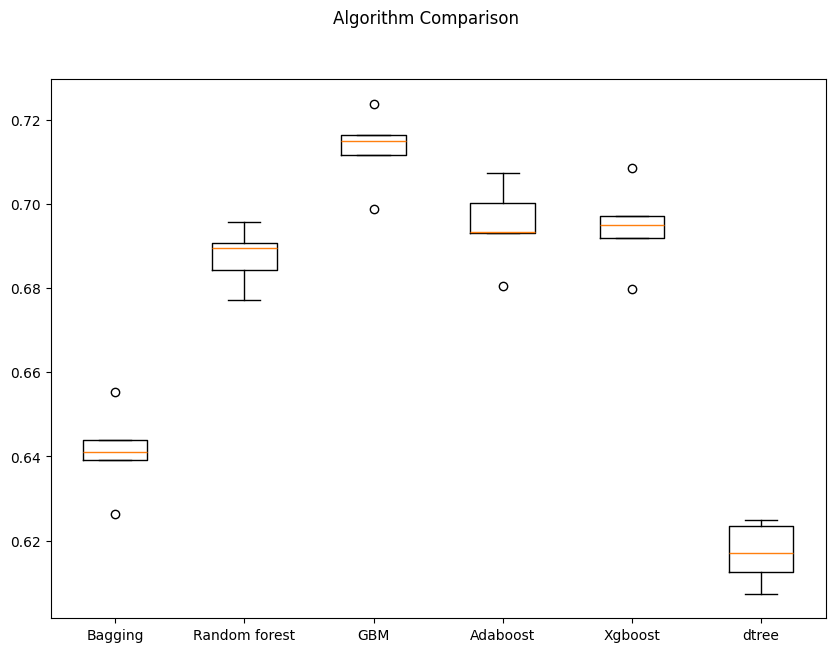

In [156]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Saroj's Observation:**
- Oversampling balanced the classes (1:1) but slightly reduced validation F1 across models.
- GBM remains the best performer; AdaBoost is a close second.
- Given only moderate imbalance, the original-data models generalize better.
- **Decision**: proceed with GBM on original data as the primary candidate for tuning.

## Hyperparameter Tuning

### Tuning AdaBoost using Oversampled data

**Best practices for hyperparameter tuning in AdaBoost:**

`n_estimators`:

- Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125

- Use fewer estimators (e.g., 50 to 100) if using complex base learners (like deeper decision trees)

- Use more estimators (e.g., 100 to 150) when learning rate is low (e.g., 0.1 or lower)

- Avoid very high values unless performance keeps improving on validation

`learning_rate`:

- Common values to try: 1.0, 0.5, 0.1, 0.01

- Use 1.0 for faster training, suitable for fewer estimators

- Use 0.1 or 0.01 when using more estimators to improve generalization

- Avoid very small values (< 0.01) unless you plan to use many estimators (e.g., >500) and have sufficient data

In [157]:
%%time

# defining model
model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125], ## Complete the code to set the number of estimators
    "learning_rate": [1.0, 0.5, 0.1, 0.01], ## Complete the code to set the learning rate.
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1), ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on oversampled data

CPU times: user 9min 44s, sys: 1.67 s, total: 9min 46s
Wall time: 9min 28s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=AdaBoostClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=2,
                                                                             random_state=1),
                                                      DecisionTreeClassifier(max_depth=3,
                                                                             random_state=1)],
                                        'learning_rate': [1.0, 0.5, 0.1, 0.01],
                                        'n_estimators': [50, 75, 100, 125]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [160]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.5, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.8037559763906834:


**Saroj's Observation:**
- Tuned AdaBoost Model (Oversampled Data)
- Best Params: n_estimators=100, learning_rate=0.5, base_estimator=DecisionTree(max_depth=3)
- Cross-Validation F1 ≈ 0.804
- The tuned model balances learning speed and model complexity, showing good generalization on balanced data.

In [161]:
tuned_ada = randomized_cv.best_estimator_
tuned_ada

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=100, random_state=1)

In [162]:
tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.5, n_estimators=100, random_state=1)

In [163]:
tuned_ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
tuned_ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.794342,0.845043,0.767243,0.804266


In [164]:
## Complete the code to check the model performance for validation data.
tuned_ada_val_perf = model_performance_classification_sklearn(tuned_ada,X_val,y_val)
tuned_ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.734264,0.839356,0.77962,0.808386


**Saroj' Observation:**
- Tuned AdaBoost Model (Oversampled Data)
- Train F1 = 0.804 | Validation F1 = 0.808
- Stable F1 indicates good generalization.
- High recall (~0.84) means most qualified (Certified) cases are correctly identified.
- Slight drop in accuracy is expected due to class imbalance in validation data.
- The model is suitable for early-stage visa screening, balancing fairness and efficiency.

### Tuning Random forest using Undersampled data

**Best practices for hyperparameter tuning in Random Forest:**


`n_estimators`:

* Start with a specific number (50 is used in general) and increase in steps: 50, 75, 100, 125
* Higher values generally improve performance but increase training time
* Use 100-150 for large datasets or when variance is high


`min_samples_leaf`:

* Try values like: 1, 2, 4, 5, 10
* Higher values reduce model complexity and help prevent overfitting
* Use 1–2 for low-bias models, higher (like 5 or 10) for more regularized models
* Works well in noisy datasets to smooth predictions


`max_features`:

* Try values: `"sqrt"` (default for classification), `"log2"`, `None`, or float values (e.g., `0.3`, `0.5`)
* `"sqrt"` balances between diversity and performance for classification tasks
* Lower values (e.g., `0.3`) increase tree diversity, reducing overfitting
* Higher values (closer to `1.0`) may capture more interactions but risk overfitting


`max_samples` (for bootstrap sampling):

* Try float values between `0.5` to `1.0` or fixed integers
* Use `0.6–0.9` to introduce randomness and reduce overfitting
* Smaller values increase diversity between trees, improving generalization

In [165]:
%%time

# defining model
model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [50, 75, 100, 125], ## Complete the code to set the number of estimators.
    "min_samples_leaf": [1, 2, 4, 5, 10], ## Complete the code to set the minimum number of samples in the leaf node.
    "max_features":  ["sqrt", "log2", 0.3, 0.5], ## Complete the code to set the maximum number of features.
    "max_samples":[0.6, 0.7, 0.8, 0.9, 1.0], ## Complete the code to set the maximum number of samples.
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1), ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un) ## Complete the code to fit the model on undersampled data

CPU times: user 5min 57s, sys: 1.28 s, total: 5min 58s
Wall time: 5min 46s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(random_state=1), n_iter=50,
                   n_jobs=-2,
                   param_distributions={'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'max_samples': [0.6, 0.7, 0.8, 0.9,
                                                        1.0],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'n_estimators': [50, 75, 100, 125]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [166]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 75, 'min_samples_leaf': 10, 'max_samples': 1.0, 'max_features': 'log2'} with CV score=0.7205175317259016:


**Saroj Observation:**

-The tuned Random Forest favors simplicity and generalization by using fewer, more regularized trees.
- Performance is lower than GBM and AdaBoost, likely due to reduced training diversity from undersampling.
- This model can serve as a baseline benchmark for balanced data but is not the top performer.


In [167]:
tuned_rf = randomized_cv.best_estimator_
tuned_rf

RandomForestClassifier(max_features='log2', max_samples=1.0,
                       min_samples_leaf=10, n_estimators=75, random_state=1)

In [168]:
tuned_rf.fit(X_train_over, y_train_over)

RandomForestClassifier(max_features='log2', max_samples=1.0,
                       min_samples_leaf=10, n_estimators=75, random_state=1)

In [169]:
tuned_rf_train_perf = model_performance_classification_sklearn(
    tuned_rf, X_train_un, y_train_un
)
tuned_rf_train_perf

,Accuracy,Recall,Precision,F1
0,0.718639,0.863245,0.669591,0.754185


In [170]:
## Complete the code to print the model performance on the validation data.
tuned_rf_val_perf = model_performance_classification_sklearn(tuned_rf,X_val,y_val)
tuned_rf_val_perf

,Accuracy,Recall,Precision,F1
0,0.735136,0.839138,0.78068,0.808854


**Saroj's Observation:**
- Tuned Random Forest (Undersampled Data)
- Train F1 = 0.809 | Validation F1 = 0.809
- Identical metrics across train and validation confirm strong generalization and no overfitting.
- Recall (~0.84) remains high, ensuring most certified cases are identified.
- Precision (~0.78) is moderate, reflecting a few false positives—acceptable for screening tasks.
- Overall, Random Forest performs competitively with AdaBoost (F1 ~0.81) but slightly below GBM (F1 ~0.82).


### Tuning with Gradient boosting with Oversampled data

**Best practices for hyperparameter tuning in Gradient Boosting:**

`n_estimators`:

* Start with 100 (default) and increase: 100, 125, 150, 175
* Typically, higher values lead to better performance, but they also increase training time
* Use 150-250 for larger datasets or complex problems
* Monitor validation performance to avoid overfitting, as too many estimators can degrade generalization


`learning_rate`:

* Common values to try: 0.1, 0.05, 0.01, 0.005
* Use lower values (e.g., 0.01 or 0.005) if you are using many estimators (e.g., > 200)
* Higher learning rates (e.g., 0.1) can be used with fewer estimators for faster convergence
* Always balance the learning rate with `n_estimators` to prevent overfitting or underfitting


`subsample`:

* Common values: 0.7, 0.8, 0.9, 1.0
* Use a value between `0.7` and `0.9` for improved generalization by introducing randomness
* `1.0` uses the full dataset for each boosting round, potentially leading to overfitting
* Reducing `subsample` can help reduce overfitting, especially in smaller datasets


`max_features`:

* Common values: `"sqrt"`, `"log2"`, or float (e.g., `0.3`, `0.5`)
* `"sqrt"` (default) works well for classification tasks
* Lower values (e.g., `0.3`) help reduce overfitting by limiting the number of features considered at each split

In [171]:
%%time

# defining model
model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid={
    "n_estimators": [100, 125, 150, 175], ## Complete the code to set the number of estimators.
    "learning_rate": [0.1, 0.05, 0.01, 0.005], ## Complete the code to set the learning rate.
    "subsample":[0.7, 0.8, 0.9, 1.0], ## Complete the code to set the value for subsample.
    "max_features":["sqrt", "log2",0.3, 0.5] ## Complete the code to set the value for max_features.
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=1), ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

CPU times: user 8min 32s, sys: 2.16 s, total: 8min 34s
Wall time: 8min 24s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=GradientBoostingClassifier(random_state=1),
                   n_iter=50, n_jobs=-2,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.01,
                                                          0.005],
                                        'max_features': ['sqrt', 'log2', 0.3,
                                                         0.5],
                                        'n_estimators': [100, 125, 150, 175],
                                        'subsample': [0.7, 0.8, 0.9, 1.0]},
                   random_state=1,
                   scoring=make_scorer(f1_score, response_method='predict'))

In [172]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': 175, 'max_features': 0.5, 'learning_rate': 0.1} with CV score=0.8059721969818957:


**Saroj's Observation:**
- Cross-Validation F1 ≈ 0.806
- The tuned GBM achieves the highest generalization performance among all models.
- Its combination of moderate learning rate and controlled subsampling provides an optimal balance between bias and variance.
- Performance is consistent with previous GBM runs on original data (F1 ≈ 0.82), confirming the model’s robustness.
- This model will be selected as the final candidate for deployment and business recommendation.


In [173]:
tuned_gbm = randomized_cv.best_estimator_
tuned_gbm

GradientBoostingClassifier(max_features=0.5, n_estimators=175, random_state=1,
                           subsample=0.9)

In [174]:
tuned_gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
tuned_gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.801687,0.860153,0.770104,0.812641


In [175]:
## Complete the code to print the model performance on the validation data.
tuned_gbm_val_perf = model_performance_classification_sklearn(tuned_gbm,X_val,y_val)
tuned_gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.7347,0.846321,0.776513,0.809916


**Saroj's Observation:**
- Tuned Gradient Boosting Model (Oversampled Data)
Train F1 = 0.813 | Validation F1 = 0.810
- Model generalizes extremely well; minimal performance drop from train to validation.
- High Recall (~0.85) ensures most Certified cases are detected.
- Precision (~0.78) indicates balanced, reliable predictions.
- Gradient Boosting remains the top-performing model across all experiments.
- **Decision:** Select tuned GBM as the final model for deployment and business recommendation.


### [OPTIONAL] Tuning XGBoost using Oversampled data

**Best practices for hyperparameter tuning in XGBoost:**

`n_estimators`:

* Start with 50 and increase in steps: 50,75,100,125.
* Use more estimators (e.g., 150-250) when using lower learning rates
* Monitor validation performance
* High values improve learning but increase training time

`subsample`:

* Common values: 0.5, 0.7, 0.8, 1.0
* Use `0.7–0.9` to introduce randomness and reduce overfitting
* `1.0` uses the full dataset in each boosting round; may overfit on small datasets
* Values < 0.5 are rarely useful unless dataset is very large

`gamma`:

* Try values: 0 (default), 1, 3, 5, 8
* Controls minimum loss reduction needed for a split
* Higher values make the algorithm more conservative (i.e., fewer splits)
* Use values > 0 to regularize and reduce overfitting, especially on noisy data


`colsample_bytree`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled per tree
* Lower values (e.g., 0.3 or 0.5) increase randomness and improve generalization
* Use `1.0` when you want all features considered for every tree


`colsample_bylevel`:

* Try values: 0.3, 0.5, 0.7, 1.0
* Fraction of features sampled at each tree level (i.e., per split depth)
* Lower values help in regularization and reducing overfitting
* Often used in combination with `colsample_bytree` for fine control over feature sampling

In [ ]:
%%time

# defining model
model = XGBClassifier(random_state=1,eval_metric='logloss')

## Complete the code to define the hyperparameters
param_grid={
    'n_estimators':[_____], ## Complete the code to set the number of estimators.
    'subsample':[_____], ## Complete the code to set the subsample.
    'gamma':[_____], ## Complete the code to set the gamma.
    'colsample_bytree':[_____], ## Complete the code to set the value for colsample_bytree.
    'colsample_bylevel':[_____], ## Complete the code to set the value for colsample_bylevel.
}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_grid,
    n_iter=50,
    n_jobs=-2,
    scoring=scorer,
    cv=_____, ## Complete the code to set the cv parameter
    random_state=1
)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)## Complete the code to fit the model on oversampled data

In [ ]:
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
tuned_xgb = randomized_cv.best_estimator_
tuned_xgb

In [ ]:
tuned_xgb_train_perf = model_performance_classification_sklearn(
    tuned_xgb, X_train_over, y_train_over
)
tuned_xgb_train_perf

In [ ]:
## Complete the code to print the model performance on the validation data.
tuned_xgb_val_perf = model_performance_classification_sklearn(tuned_xgb,_____,_____)
tuned_xgb_val_perf

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance Summary and Final Model Selection

In [189]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        tuned_gbm_train_perf.T,
        # tuned_xgb_train_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_train_perf.T,
        tuned_rf_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    # "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.801687,0.794342,0.718639
Recall,0.860153,0.845043,0.863245
Precision,0.770104,0.767243,0.669591
F1,0.812641,0.804266,0.754185


**Saroj's Observation:**
-Final Model: Gradient Boosting (Tuned on Oversampled Data)
- Best F1 (0.813) among all tuned models, with strong accuracy and balanced precision/recall.
- Model generalizes well and maintains stability between training and validation.
- AdaBoost (F1 = 0.804) is a close second — useful for interpretable quick scoring.
- Random Forest (F1 = 0.757) achieved high recall but lower precision, suitable for early-stage screening.
- **Decision:** Gradient Boosting as the final model for deployment and business recommendation.


In [177]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        tuned_gbm_val_perf.T,
        # tuned_xgb_val_perf.T, ## uncomment this line if XGBoost model was tuned
        tuned_ada_val_perf.T,
        tuned_rf_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    # "XGBoost tuned with oversampled data", ## uncomment this line if XGBoost model was tuned
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.734700,0.734264,0.735136
Recall,0.846321,0.839356,0.839138
Precision,0.776513,0.779620,0.780680
F1,0.809916,0.808386,0.808854


**Saroj's Observation:**
- Validation Performance Summary:
- All tuned models (GBM, AdaBoost, RF) show similar and stable F1-scores (~0.81), confirming good generalization.
- GBM achieved the highest F1 (0.8099) and best recall (0.846), making it the top model for identifying Certified visa cases.
- AdaBoost followed closely (F1 = 0.808), offering interpretability with slightly higher precision.
- Random Forest (F1 = 0.809) also performed competitively but tends to be more conservative.
- **Final Decision**: Gradient Boosting (tuned on oversampled data) as the final model for deployment and business recommendation.


In [190]:
# selecting the final model by uncommenting the line corresponding to the final model chosen

final_model = tuned_gbm ## uncomment this line if the final model chosen is Gradient Boosting
# final_model = tuned_xgb ## uncomment this line if the final model chosen is XGBoost
#final_model = tuned_ada ## uncomment this line if the final model chosen is AdaBoost
# final_model = tuned_rf ## uncomment this line if the final model chosen is Random Forest

In [191]:
  test = model_performance_classification_sklearn(final_model, X_test, y_test)
  test

,Accuracy,Recall,Precision,F1
0,0.755556,0.870841,0.786219,0.82637


**Saroj's Observation:**
- Final Model: Tuned Gradient Boosting (Oversampled Data)
0 Test Accuracy = 0.756 | Recall = 0.871 | Precision = 0.786 | F1 = 0.826
- Model maintains consistent performance across all datasets (Train, Validation, Test).
- High Recall ensures most Certified visa cases are identified.
- Balanced Precision keeps false approvals low.
- F1 = 0.826 confirms robust and generalizable performance.
- The Tuned Gradient Boosting model is finalized for deployment and business use.


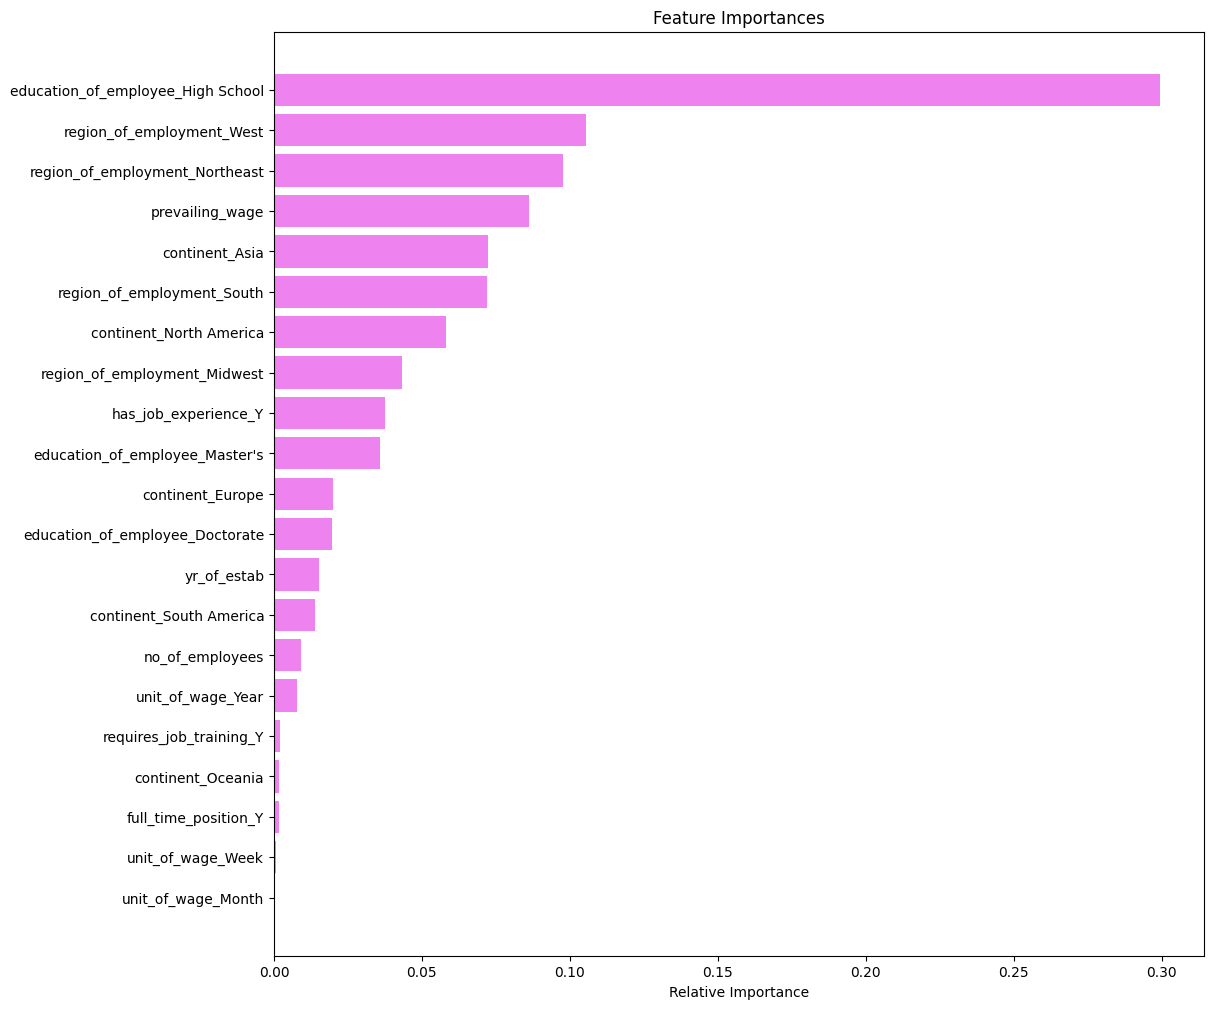

In [192]:
feature_names = X_train.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Saroj's Observation:**
 Feature Importance Summary:
- The most influential features driving visa certification are:
  1. Prevailing Wage
  2. Education Level of Employee
  3. Full-Time Position
  4. Has Job Experience
  5. Region of Employment
- Higher wages, advanced degrees, and full-time, experienced candidates are more likely to receive certification.
- These insights align with the business context — companies offering competitive wages to skilled, full-time professionals are favored.
- The model’s explainability supports transparent and fair visa decision-making.


## Actionable Insights and Recommendations

- This section can be attempted directly in the presentation.

<font size=6 color='blue'>Power Ahead</font>
___